#Agentic AI

* What is an agent?
* Key components of Agentic Framework
* Thinking framework : ReAct(CoT, ToT)
* LangGraph

In [9]:
!git clone https://github.com/genaiconference/AgenticAI_GenAIHack.git

Cloning into 'AgenticAI_GenAIHack'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 110 (delta 52), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (110/110), 6.62 MiB | 5.45 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [34]:
!pip install -r /content/AgenticAI_GenAIHack/requirements_agenti_ai.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 88.3 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.4
    Uninstalling lxml-4.9.4:
      Successfully uninstalled lxml-4.9.4


In [2]:
!pip install langchain_openai==0.1.16

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00


In [14]:
import os
from dotenv import load_dotenv
load_dotenv(dotenv_path="/content/.env")

GPT4o_DEPLOYMENT_NAME = os.getenv('GPT4o_DEPLOYMENT_NAME')
API_KEY = os.getenv('east_us2_API_KEY')
API_BASE = os.getenv('east_us2_API_BASE')
API_TYPE = os.getenv('API_TYPE')
API_VERSION = os.getenv('API_VERSION')

from langchain_openai import AzureChatOpenAI

llm = AzureChatOpenAI(
        azure_endpoint=API_BASE,
        openai_api_version=API_VERSION,
        azure_deployment=GPT4o_DEPLOYMENT_NAME,
        openai_api_key=API_KEY,
        openai_api_type=API_TYPE,
        temperature=0)

In [ ]:
# Add open ai style

#Simple LangGraph
2 Nodes connected by an edge

In [15]:
llm.invoke("Tell me an ant joke")

AIMessage(content="Sure, here's a classic ant joke for you:\n\nWhy did the ant bring a suitcase to work?\n\nBecause it wanted to be a little buggier!", response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 12, 'total_tokens': 43}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_abc28019ad', 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {}}, id='run-ce352057-94af-4f6f-9633-cfc8f2774d3d-0')

Now let's make each Node is a **function**

In [11]:
def func_1(input_1):
    return input_1 + " First Function"

def func_2(input_2):
    return input_2 + " to Second Function"

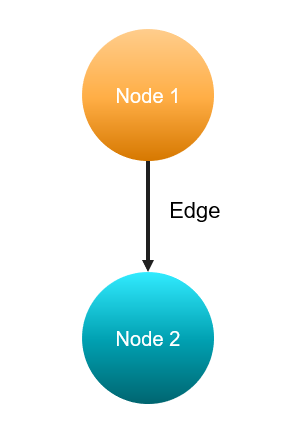

In [12]:
from langgraph.graph import Graph

# Define a graph
workflow = Graph()

# Add nodes to the graph
workflow.add_node("node_1",func_1)
workflow.add_node("node_2",func_2)

# Time to add edge
workflow.add_edge("node_1", "node_2")

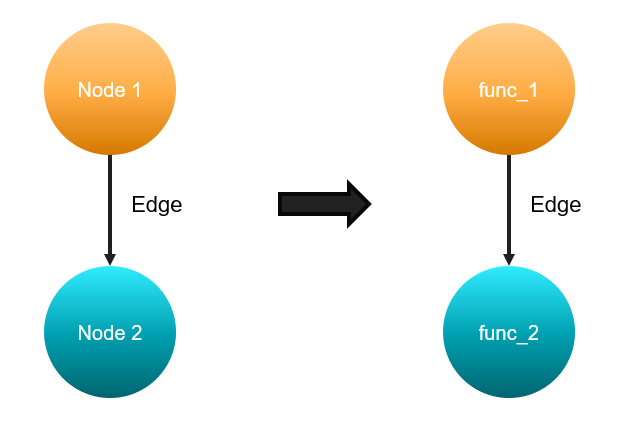

In [13]:
#Set Entry and Exit points
workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

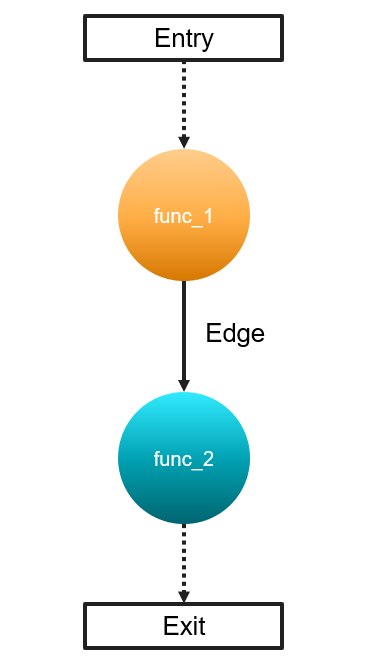

In [6]:
app.invoke("I move from")

'I move from First Function to Second Function'

**Streaming output from LangGraph**

stream() method outputs dictionary of the format

```
{node_name : output_from_the_node}
```



In [7]:
graph_input = 'I am moving from'
for output in app.stream(graph_input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("---\n")

Output from node 'node_1':
---
I am moving from First Function
---

Output from node 'node_2':
---
I am moving from First Function to Second Function
---



# Sentiment Analysis using LangGraph

In [16]:
def sentiment_analysis(input_1):
    SA_prompt = f"""You are an expert at performing sentiment analysis.
    Your task is identify the sentiment of the provided input.
    Provide only the sentiment based on the user input.
    Don't include reasoning.

    User input: {input_1}"""

    response = llm.invoke(SA_prompt)
    return response.content

def convert_to_upper(input_2):
    Sentiment_UPPER = input_2.upper()
    response = f"Here is the SENTIMENT in UPPER case: {Sentiment_UPPER}"
    return response

In [17]:
# Define a Langchain graph
workflow = Graph()

workflow.add_node("sentiment_analysis", sentiment_analysis)
workflow.add_node("convert_to_upper", convert_to_upper)

workflow.add_edge('sentiment_analysis', 'convert_to_upper')

workflow.set_entry_point("sentiment_analysis")
workflow.set_finish_point("convert_to_upper")

app = workflow.compile()

### Visulize the Graph

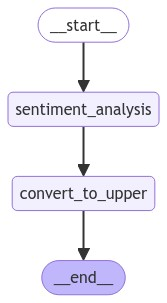

In [18]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
tweet = "The movie was so nice that I walked out in 2 min"
app.invoke(tweet)

'Here is the SENTIMENT in UPPER case: NEGATIVE'

In [20]:
tweet = "Wish the movie was nice. But it was extraordinary"
app.invoke(tweet)

'Here is the SENTIMENT in UPPER case: POSITIVE'

### Streaming

In [21]:
for output in app.stream(tweet):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("---\n")

Output from node 'sentiment_analysis':
---
Positive
---

Output from node 'convert_to_upper':
---
Here is the SENTIMENT in UPPER case: POSITIVE
---



# State

Now Let's introduce the state to the Graph.

One of the central concepts of LangGraph is state. Each graph execution creates a state that is passed between nodes in the graph as they execute, and each node updates this internal state with its return value after it executes.


## Benefits

-Enables stateful applications that can maintain context over multiple interactions

-Allows for coordination between multiple agents or components

-Facilitates error handling and recovery via checkpointing

-Simplifies the development of complex workflows

In [22]:
import torch
from transformers import pipeline

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    user_review: str
    sentiment_label: str
    sentiment_label_in_upper: str


def sentiment_analysis(state):
    print("------ENTERING: SENTIMENT ANALYSIS NODE------")
    print(state)
    SA_prompt = f"""You are an expert at performing sentiment analysis.
    Your task is identify the sentiment of the provided input.
    Provide only the sentiment based on the user input.
    Don't include reasoning.

    User input: {state['user_review']}"""

    response = llm.invoke(SA_prompt)

    return {"sentiment_label": response.content}


def convert_to_upper(state):
    print("------ENTERING: CONVERT_TO_UPPER NODE------")
    print(state)
    Sentiment_UPPER = state['sentiment_label'].upper()
    return {"sentiment_label_in_upper": Sentiment_UPPER}



# Define a graph
workflow = StateGraph(State)

workflow.add_node("sentiment_analysis", sentiment_analysis)
workflow.add_node("convert_to_upper", convert_to_upper)

workflow.add_edge('sentiment_analysis', 'convert_to_upper')

workflow.set_entry_point("sentiment_analysis")
workflow.set_finish_point("convert_to_upper")

app = workflow.compile()

### Visualize the Graph

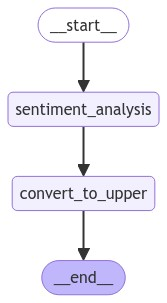

In [23]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [24]:
from simple_colors import *

review = "The movie was so nice that I walked out in 2 min"
input_review = {"user_review": review}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for output in app.stream(input_review, thread, stream_mode="values"):
    print(blue(output, ['bold']))

{'user_review': 'The movie was so nice that I walked out in 2 min'}
------ENTERING: SENTIMENT ANALYSIS NODE------
{'user_review': 'The movie was so nice that I walked out in 2 min', 'sentiment_label': None, 'sentiment_label_in_upper': None}
{'user_review': 'The movie was so nice that I walked out in 2 min', 'sentiment_label': 'Negative'}
------ENTERING: CONVERT_TO_UPPER NODE------
{'user_review': 'The movie was so nice that I walked out in 2 min', 'sentiment_label': 'Negative', 'sentiment_label_in_upper': None}
{'user_review': 'The movie was so nice that I walked out in 2 min', 'sentiment_label': 'Negative', 'sentiment_label_in_upper': 'NEGATIVE'}


In [25]:
from simple_colors import *

review = "Wish the movie was nice. But it was extraordinary"
input_review = {"user_review": review}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for output in app.stream(input_review, thread, stream_mode="values"):
    print(blue(output, ['bold']))

{'user_review': 'Wish the movie was nice. But it was extraordinary'}
------ENTERING: SENTIMENT ANALYSIS NODE------
{'user_review': 'Wish the movie was nice. But it was extraordinary', 'sentiment_label': None, 'sentiment_label_in_upper': None}
{'user_review': 'Wish the movie was nice. But it was extraordinary', 'sentiment_label': 'Positive'}
------ENTERING: CONVERT_TO_UPPER NODE------
{'user_review': 'Wish the movie was nice. But it was extraordinary', 'sentiment_label': 'Positive', 'sentiment_label_in_upper': None}
{'user_review': 'Wish the movie was nice. But it was extraordinary', 'sentiment_label': 'Positive', 'sentiment_label_in_upper': 'POSITIVE'}


In [ ]:
# Brandan -> Read write operator from the tutorial

## Conditional Edge

In [26]:
import functools, operator
from typing import Annotated
from IPython.display import Markdown
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    user_review: str
    sentiment_label: str
    feedback_analysis: str
    overall_status: Annotated[str, operator.add]


def sentiment_analysis(state):
    print("------ENTERING: SENTIMENT ANALYSIS NODE------")
    print(state)
    SA_prompt = f"""You are an expert at performing sentiment analysis.
    Your task is identify the sentiment of the provided input.
    Provide only the sentiment based on the user input.
    Don't include reasoning.

    User input: {state['user_review']}"""

    response = llm.invoke(SA_prompt)

    print("--------")
    print(red(f"Sentiment Identified: [{response.content}]", ['bold']))
    print("--------")

    return {"sentiment_label": response.content}



def user_review_analysis(state):
    print("------ENTERING: USER REVIEW ANALYSIS NODE------")
    print(state)
    feedback_analysis_prompt = f"""You are an expert at performing analysis on the user review. The review can be about a movie or a product.
    Your task is to carefully analyze the user review and give top reasons of what did not work for the user.
    Make the answer readable.
    Note: Provide your analysis only using the user review and justify the sentiment

    User review: {state['user_review']}
    Sentiment Identified: {state['sentiment_label']}"""

    response = llm.invoke(feedback_analysis_prompt)

    display(Markdown(response.content))

    return {"feedback_analysis": response.content}


# Define a graph
workflow = StateGraph(State)

workflow.add_node("sentiment_analysis", sentiment_analysis)
workflow.add_node("user_review_analysis", user_review_analysis)

workflow.set_entry_point("sentiment_analysis")

def where_to_go(state):
    if state["sentiment_label"].lower() == "positive":
        return END
    else:
        return "user_review_analysis"

workflow.add_conditional_edges("sentiment_analysis", where_to_go, ["user_review_analysis", END])

workflow.add_edge('user_review_analysis', END)

app = workflow.compile()

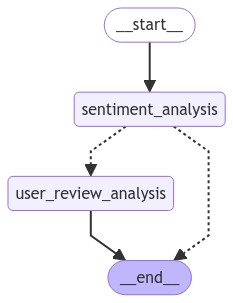

In [27]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [28]:
from simple_colors import *

review = """Buckle up for a roller-coaster ride through cinematic chaos! The story idea is an absolute gem, brimming with potential, and the characters are nothing short of a casting director's dream-each one brimming with pizzazz and personality. But alas, their development seems to have been left in the microwave a bit too long, coming out half-baked.

The screenplay? It's flatter than a week-old soda. Though, I must admit, it does have its fizz in a few key moments, like the interval and the climax.

Dialogues? Let's just say they won't be winning any literary awards.

Now, onto the comedy-it's the kind that instead of tickling your funny bone, it goes straight for the jugular, and not in a good way. The world-building feels like it was put together with duct tape and imagination, lacking the immersive magic we hoped for.

But let's talk about the legendary Amitabh Bachchan, who is stellar as always.

Prabhas gives it his all, bless his heart.

Kamal Hassan makes a brief yet dazzling appearance, hinting at more brilliance in the next instalment.

Saswata Chatterjee? He brings his A-game, no doubt about it.

Deepika Padukone looks fine and delivers a decent performance, and her Telugu dubbing is better than that in the trailer.

Disha Patani is scorching enough to set the screen on fire in her limited screen time.

The rest of the cast, including Pashupati, Shobhana and Rajendra Prasad put in decent efforts. However, the film is sprinkled with cameos like confetti at a surprise party-most of which are more of a head-scratcher than a treat.

The action scenes? They're as disappointing as a soggy French fry.

Cinematography is serviceable, background music hits the right notes, but the songs miss the mark.

Production values are respectable, but direction sails somewhere in the middling seas of mediocrity.

Some VFX are eye-poppingly good, though.

Overall, it's a mixed bag of delights and letdowns-a cinematic hotpot where the ingredients are only half-cooked. Enjoy it for what it is, but don't be surprised if you leave the theater feeling a little unsatisfied"""

user_input = {"user_review": review}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for output in app.stream(user_input, thread, stream_mode="values"):
    print(blue(output, ['bold']))

{'user_review': "Buckle up for a roller-coaster ride through cinematic chaos! The story idea is an absolute gem, brimming with potential, and the characters are nothing short of a casting director's dream-each one brimming with pizzazz and personality. But alas, their development seems to have been left in the microwave a bit too long, coming out half-baked.\n\nThe screenplay? It's flatter than a week-old soda. Though, I must admit, it does have its fizz in a few key moments, like the interval and the climax.\n\nDialogues? Let's just say they won't be winning any literary awards.\n\nNow, onto the comedy-it's the kind that instead of tickling your funny bone, it goes straight for the jugular, and not in a good way. The world-building feels like it was put together with duct tape and imagination, lacking the immersive magic we hoped for.\n\nBut let's talk about the legendary Amitabh Bachchan, who is stellar as always.\n\nPrabhas gives it his all, bless his heart.\n\nKamal Hassan makes a 

Based on the user review, here are the top reasons why the movie did not work for the user:

1. **Character Development**:
   - The characters, despite having great potential and being well-cast, were described as "half-baked." This suggests that the characters were not fully developed, leaving the audience wanting more depth and growth.

2. **Screenplay**:
   - The screenplay was criticized for being "flatter than a week-old soda," indicating that it lacked engagement and excitement. Although there were a few key moments that stood out, the overall narrative failed to maintain a consistent level of interest.

3. **Dialogues**:
   - The dialogues were deemed unremarkable and not memorable, with the user explicitly stating that they "won't be winning any literary awards." This implies that the writing did not resonate or leave a lasting impact.

4. **Comedy**:
   - The comedy was described as aggressive and ineffective, failing to elicit the intended humor. Instead of being funny, it was perceived as overbearing and unpleasant.

5. **World-Building**:
   - The world-building was seen as lacking, described as being "put together with duct tape and imagination." This suggests that the setting and environment of the movie did not feel immersive or well-crafted.

6. **Action Scenes**:
   - The action scenes were compared to "a soggy French fry," indicating that they were underwhelming and failed to deliver the excitement and intensity expected from action sequences.

7. **Songs**:
   - While the background music was appreciated, the songs themselves "miss the mark," suggesting that they did not enhance the movie or leave a memorable impression.

8. **Direction**:
   - The direction was described as "middling," implying that it was average and did not stand out in any significant way. This lack of strong direction likely contributed to the overall feeling of mediocrity.

9. **Cameos**:
   - The numerous cameos were seen as more confusing than enjoyable, likened to "confetti at a surprise party" but ultimately being "head-scratchers." This suggests that the cameos did not add value to the movie and may have detracted from the main narrative.

Despite these criticisms, the user did acknowledge some positive aspects, such as the performances of certain actors (e.g., Amitabh Bachchan, Prabhas, Kamal Hassan, Saswata Chatterjee, Deepika Padukone, and Disha Patani) and some impressive VFX. However, the overall sentiment remains mixed due to the significant shortcomings highlighted above.

{'user_review': "Buckle up for a roller-coaster ride through cinematic chaos! The story idea is an absolute gem, brimming with potential, and the characters are nothing short of a casting director's dream-each one brimming with pizzazz and personality. But alas, their development seems to have been left in the microwave a bit too long, coming out half-baked.\n\nThe screenplay? It's flatter than a week-old soda. Though, I must admit, it does have its fizz in a few key moments, like the interval and the climax.\n\nDialogues? Let's just say they won't be winning any literary awards.\n\nNow, onto the comedy-it's the kind that instead of tickling your funny bone, it goes straight for the jugular, and not in a good way. The world-building feels like it was put together with duct tape and imagination, lacking the immersive magic we hoped for.\n\nBut let's talk about the legendary Amitabh Bachchan, who is stellar as always.\n\nPrabhas gives it his all, bless his heart.\n\nKamal Hassan makes a 

# Branching

In [35]:
from langchain.agents import AgentType
from langchain.chat_models import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.agents import Tool, AgentExecutor, create_openai_tools_agent
from duckduckgo_search import DDGS



def create_web_search_agent(llm: ChatOpenAI, tools: list, system_prompt: str, verbose=False):
    """Helper function for creating agent executor"""
    prompt = ChatPromptTemplate.from_messages([
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="input"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ])
    agent = create_openai_tools_agent(llm, tools, prompt)
    executor = AgentExecutor(agent=agent, tools=tools, verbose=verbose)
    return executor


def create_evaluation_agent(llm, prompt):
    tester_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", prompt,),
        MessagesPlaceholder(variable_name="messages"),
    ]
    )
    tester_agent = tester_prompt | llm
    return tester_agent

In [45]:
import functools, operator
from typing import Annotated
from langchain.tools import tool
from IPython.display import Markdown
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage, AnyMessage


class State(TypedDict):
    theme: str
    concept_1: str
    concept_2: str
    concept_winner: str
    screenplay_1: str
    screenplay_2: str
    screenplay_winner: str
    overall_status: Annotated[str, operator.add]


# Create a tool to search the internet using DuckDuckGo.
@tool("internet_search", return_direct=False)
def internet_search(query: str) -> str:
    """Use this tool when you need to answer questions related to current events and latest happenings"""
    with DDGS() as ddgs:
        results = [r for r in ddgs.text(query, max_results=5)]
        return results if results else "No results found."


def topic_modelling_node(state):
    print("------ENTERING: TOPIC MODELLING NODE------")
    return {"topic": "DUMMY TOPIC"}


def ad_concept_creation_node_1(state):
    print("------ENTERING: CONCEPT CREATION NODE 1------")
    writer_prompt = """You are an intelligent advertisement concept creator for any given theme.
                        Your job is to generate a concept for the given theme and justify it.
                        Note: You can search over internet for the references but make sure the concept is fresh and novel.
                        You are a big fan of director SS Rajamouli and your screenplay will be mostly influenced by his past work and follow similar style.
                        Output will be restricted to 100 words
"""
    # Tool to run python codes in
    tools = [internet_search]
    developer_agent = create_web_search_agent(llm, tools, writer_prompt, verbose = False)
    concept = developer_agent.invoke({"input": [HumanMessage(content=state['theme'])]})
    display(Markdown(f"""**CONCEPT 1:** <font color="blue">{concept['output']}</font>"""))

    return {"concept_1": concept['output']}



def ad_concept_creation_node_2(state):
    print("------ENTERING: CONCEPT CREATION NODE 2------")
    writer_prompt = """You are an intelligent advertisement concept creator for any given theme.
                        Your job is to generate a concept for the given theme and justify it.
                        Note: You can search over internet for the references but make sure the concept is fresh and novel.
                        You are a big fan of director Shankar Shanmugam and your screenplay will be mostly influenced by his past work and follow similar style.
                        Output will be restricted to 100 words
"""
    # Tool to run python codes in
    tools = [internet_search]
    developer_agent = create_web_search_agent(llm, tools, writer_prompt, verbose = False)
    concept = developer_agent.invoke({"input": [HumanMessage(content=state['theme'])]})
    display(Markdown(f"""**CONCEPT 2:** <font color="green">{concept['output']}</font>"""))

    return {"concept_2": concept['output']}


def concept_evaluation_node(state):
    user_input = input("Which concept did you like and proceed with? Is it concept_1 aor concept_2?")

    display(Markdown(f"""**CONCEPT WINNER:** <font color="red">[{user_input}]</font>"""))
    display(Markdown(f"""**CONCEPT:** <font color="red">[{state[user_input]}]</font>"""))

    return {"concept_winner": user_input}


def screen_play_creation_node_1(state):
    print("------ENTERING: SCREEN PLAY CREATION NODE 1------")
    writer_prompt = f"""You are an intelligent screenplay writer for any given theme and concept for an advertisement.
                        Your job is to generate a detailed screenfor a 10 second advertisement for the given theme and concept.
                        You are a big fan of director SS Rajamouli and your screenplay will be mostly influenced by his past work and follow similar style.

                        Given Theme: {state['theme']}
                        Given Concept: {state[state['concept_winner']]}"""

    tools = [internet_search]
    developer_agent = create_web_search_agent(llm, tools, writer_prompt, verbose = False)
    screenplay = developer_agent.invoke({"input": [HumanMessage(content=state['theme'])]})
    display(Markdown(f"""**SCREENPLAY 1:** <font color="blue">{screenplay['output']}</font>"""))
    return {"screenplay_1": screenplay['output']}


def screen_play_creation_node_2(state):
    print("------ENTERING: SCREENN PLAY CREATION NODE 2------")
    writer_prompt = f"""You are an intelligent screenplay writer for any given theme and concept for an advertisement.
                        Your job is to generate a detailed screenfor a 10 second advertisement for the given theme and concept.
                        You are a big fan of director Shankar Shanmugam and your screenplay will be mostly influenced by his past work and follow similar style.

                        Given Theme: {state['theme']}
                        Given Concept: {state[state['concept_winner']]}"""

    tools = [internet_search]
    developer_agent = create_web_search_agent(llm, tools, writer_prompt, verbose = False)
    screenplay = developer_agent.invoke({"input": [HumanMessage(content=state['theme'])]})
    display(Markdown(f"""**SCREENPLAY 2:** <font color="green">{screenplay['output']}</font>"""))
    return {"screenplay_2": screenplay['output']}


def screenplay_evaluation_node(state):
    user_input = input("Which screenplay did you like and proceed with? Is it screenplay_1 aor screenplay_2?")
    display(Markdown(f"""**CONCEPT WINNER:** <font color="red">[{user_input}]</font>"""))
    display(Markdown(f"""**CONCEPT:** <font color="red">[{state[user_input]}]</font>"""))
    return {"screenplay_winner": user_input}


# Define a graph
workflow = StateGraph(State)

# workflow.add_node("topic_modelling_node", topic_modelling_node)
workflow.add_node("ad_concept_creation_node_1", ad_concept_creation_node_1)
workflow.add_node("ad_concept_creation_node_2", ad_concept_creation_node_2)
workflow.add_node("concept_evaluation_node", concept_evaluation_node)
workflow.add_node("screen_play_creation_node_1", screen_play_creation_node_1)
workflow.add_node("screen_play_creation_node_2", screen_play_creation_node_2)
workflow.add_node("screenplay_evaluation_node", screenplay_evaluation_node)


# workflow.set_entry_point("topic_modelling_node")

workflow.add_edge(START, "ad_concept_creation_node_1")
workflow.add_edge(START, "ad_concept_creation_node_2")

workflow.add_edge("ad_concept_creation_node_1", "concept_evaluation_node")
workflow.add_edge("ad_concept_creation_node_2", "concept_evaluation_node")

workflow.add_edge("concept_evaluation_node", "screen_play_creation_node_1")
workflow.add_edge("concept_evaluation_node", "screen_play_creation_node_2")

workflow.add_edge("screen_play_creation_node_1", "screenplay_evaluation_node")
workflow.add_edge("screen_play_creation_node_2", "screenplay_evaluation_node")

workflow.set_finish_point("screenplay_evaluation_node")

app = workflow.compile()

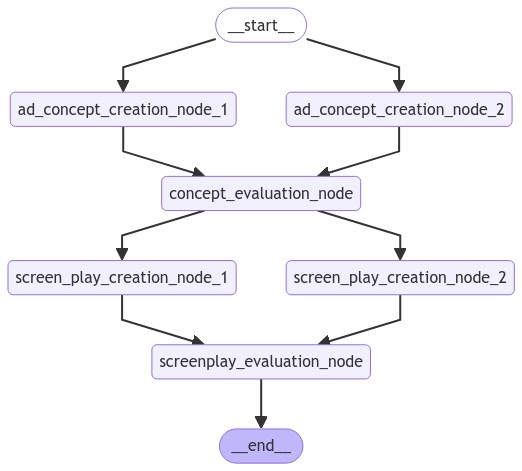

In [37]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
# Advertisement Theme -> Input
# Based on theme create a concept (Two agents)
# Pick a concept as winne
# Based on the concept picked elaboarte screenplay

In [ ]:
# 30 seconds -> ad

In [ ]:
!

In [ ]:
from simple_colors import *

graph_input = {"theme": "Actor Vijay Political Party"}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for output in app.stream(graph_input, thread, stream_mode="values"):
    print(cyan(output, ['bold']))